In [1]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, morphology
import cv2

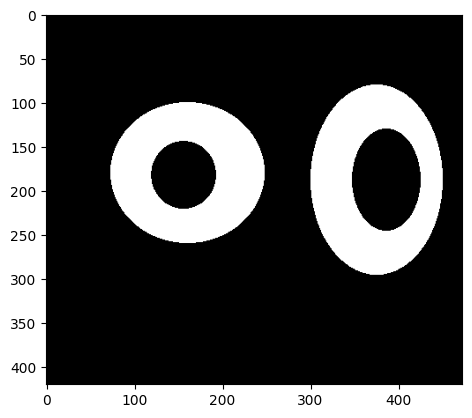

In [18]:
# Image path
image_path = "/home/users/jma-21/IA716 - Perception pour les systèmes autonomes/scanning-laser-ophthalmoscopy/data/input/exercise/fill_hole_cut.png"

# Open the image file
image = Image.open(image_path)

# Display the image
plt.imshow(image)

In [3]:
# Define a kernel size for the morphological operation
kernel_size = 65

# Perform morphological closing on the image using a square kernel
morph_image = image.filter(ImageFilter.MaxFilter(kernel_size))

kernel_size = 175
morph_image = morph_image.filter(ImageFilter.MinFilter(kernel_size))

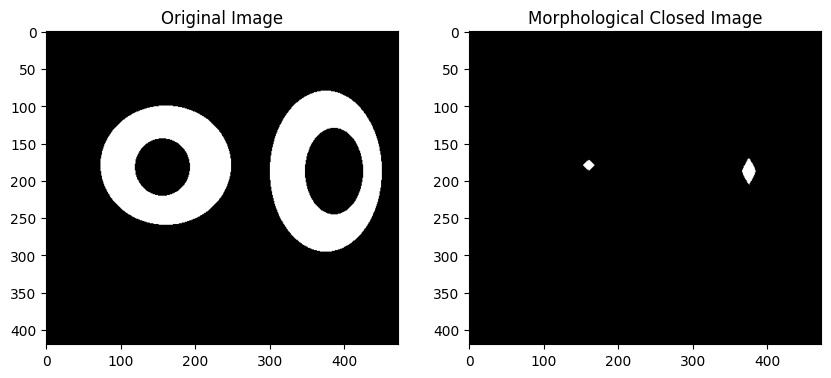

In [4]:
# Display the original and morphological closed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(morph_image)
axs[1].set_title('Morphological Closed Image')
plt.show()

In [28]:
# Define the size and shape of the structuring element
width = 90
height = 120
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (width, height))

# Perform dilation on the image using the structuring element
dilated_image = cv2.dilate(np.array(morph_image), kernel)

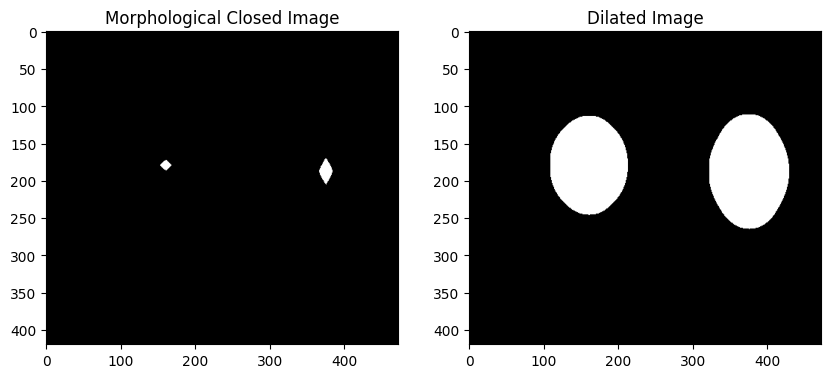

In [29]:
# Display the original and morphological closed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(morph_image)
axs[0].set_title('Morphological Closed Image')
axs[1].imshow(dilated_image)
axs[1].set_title('Dilated Image')
plt.show()

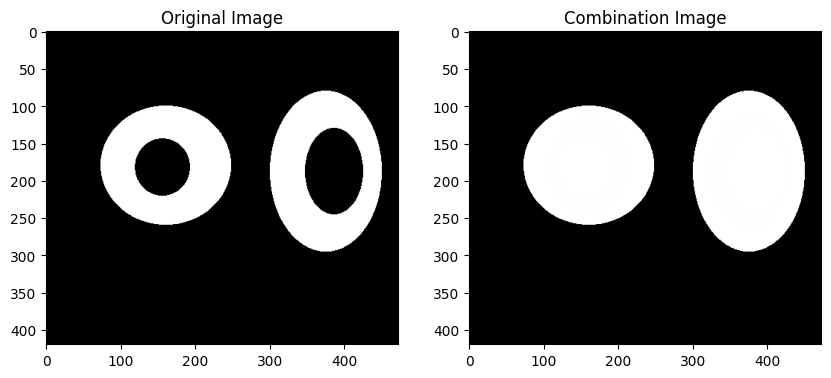

In [30]:
combination = np.array(image)+dilated_image

# Display the original and morphological closed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(combination)
axs[1].set_title('Combination Image')
plt.show()

**It seems done, that's one way to do it.**

In [39]:
# Define a kernel size for the morphological operation
kernel_size = 3

# Perform morphological erosion on the image using a square kernel
erosion_image = image.filter(ImageFilter.MinFilter(kernel_size))

# Compute the morphological inner gradient of the image
inner_gradient = np.array(image) - np.array(erosion_image)

# Create an Image object from the inner gradient array
inner_gradient_image = Image.fromarray(inner_gradient)

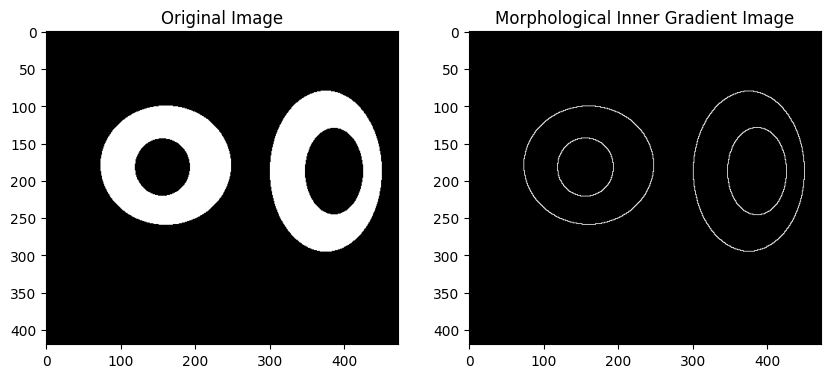

In [40]:
# Display the original and morphological inner gradient images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(inner_gradient_image)
axs[1].set_title('Morphological Inner Gradient Image')
plt.show()